### Figures for supplementary of 'Is the Fate of Deep Convective Systems written form the start?'

In [89]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from tqdm import tqdm
import joblib
from scipy.stats import gaussian_kde
from scipy.stats import percentileofscore
import cartopy.crs as ccrs
import xarray as xr
from sklearn.preprocessing import StandardScaler
%load_ext autoreload
%autoreload 2
import sys
module_dir = '/home/b/b381993'
sys.path.append(module_dir)
from DeepFate import config


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 14})

In [91]:
path_figures = '/home/b/b381993/DeepFate/figures_npj_si'

In [92]:

from DeepFate.datasets.load_toocan_dyamond import load_TOOCAN_DYAMOND
from DeepFate.datasets.utils import get_list_valid_mcs, get_validity_lifecycles_start_end

from DeepFate.datasets.utils import generate_img_seg_file_path_from_utc, generate_dyamond_file_path_from_utc, open_xarray_rolling_lon, binary_segmentation_mask_processing, compute_delta_time


from DeepFate.config import PATH_TOOCAN_GLOBAL_FILE, INPUT_VARIABLES, MCS_SPECS_RANGE, MAX_LAT_TROPICS, START_3D_UTC_SEC, END_3D_UTC_SEC




path = PATH_TOOCAN_GLOBAL_FILE ###path change with new file
list_object_mcs = load_TOOCAN_DYAMOND(path) ##change load_tooca

list_valid_mcs = get_list_valid_mcs(list_object_mcs = list_object_mcs,
                   max_area=MCS_SPECS_RANGE['max_area'][1],
                    min_area=MCS_SPECS_RANGE['max_area'][0],
                    duration_max = MCS_SPECS_RANGE['duration_hour'][1], #now in hours
                    duration_min = MCS_SPECS_RANGE['duration_hour'][0],
                    lat_max=MAX_LAT_TROPICS,
                    )

validitity, start_times, end_times = get_validity_lifecycles_start_end(list_valid_mcs,  mode_3d=True, UTC_3d_start=START_3D_UTC_SEC, UTC_3d_end = END_3D_UTC_SEC)
list_valid_mcs_2 = [list_valid_mcs[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]
list_start_times = [start_times[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]
list_end_times = [end_times[i] for i in range(len(list_valid_mcs)) if validitity[i] is True]


100%|██████████| 34617/34617 [00:01<00:00, 29791.61it/s]


In [93]:
import pandas as pd
import DeepFate
df_relation_table = pd.read_csv(DeepFate.config.PATH_RELATION_TABLE)
lat_delta_pixels = DeepFate.config.SPACE_WINDOW['lat_delta_pixels']
lon_delta_pixels = DeepFate.config.SPACE_WINDOW['lon_delta_pixels']
lat_delta_degrees = DeepFate.config.SPACE_WINDOW['lat_delta_degrees']
lon_delta_degrees = DeepFate.config.SPACE_WINDOW['lon_delta_degrees']
lat_list_all=[]
lon_list_all=[]
utc_list_all=[]
duration_all=[]
label_all=[]
for mcs, start_idx, end_idx in zip(list_valid_mcs_2,list_start_times, list_end_times) :
    lat_list_all.append(mcs.clusters.LC_lat[start_idx:end_idx])
    lon_list_all.append(mcs.clusters.LC_lon[start_idx:end_idx])
    utc_list_all.append(mcs.clusters.LC_UTC_time[start_idx:end_idx])
    duration_all.append(0.5*(end_idx-start_idx))
    label_all.append(mcs.DCS_number)

In [94]:
df_merged_2d_3d = pd.read_csv('/work/bb1153/b381993/data3/data/MERGED_RELATION_3D_2D_ALL_FILES.csv')


In [95]:
df_merged_2d_3d

Unnamed: 0                                path_dyamond_2d        time  \
0              0  DYAMOND_9216x4608x74_7.5s_4km_4608_0000000240  214.020828   
1              1  DYAMOND_9216x4608x74_7.5s_4km_4608_0000000480  214.041672   
2              2  DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720  214.062500   
3              3  DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960  214.083328   
4              4  DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200  214.104172   
...          ...                                            ...         ...   
1916        1916  DYAMOND_9216x4608x74_7.5s_4km_4608_0000459840  253.916672   
1917        1917  DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080  253.937500   
1918        1918  DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320  253.958328   
1919        1919  DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560  253.979172   
1920        1920  DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800  254.000000   

                                    path_dyamond_3d  
0                                               NaN  
1                                               NaN  
2                                               NaN  
3                                               NaN  
4                                               NaN  
...                                             ...  
1916  DYAMOND_9216x4608x74_7.5s_4km_4608_0000459360  
1917  DYAMOND_9216x4608x74_7.5s_4km_4608_0000459360  
1918  DYAMOND_9216x4608x74_7.5s_4km_4608_0000459360  
1919  DYAMOND_9216x4608x74_7.5s_4km_4608_0000459360  
1920  DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800  

[1921 rows x 4 columns]

In [96]:
df_relation_table = pd.read_csv(DeepFate.config.PATH_RELATION_TABLE)
lat_delta_pixels = DeepFate.config.SPACE_WINDOW['lat_delta_pixels']
lon_delta_pixels = DeepFate.config.SPACE_WINDOW['lon_delta_pixels']
lat_delta_degrees = DeepFate.config.SPACE_WINDOW['lat_delta_degrees']
lon_delta_degrees = DeepFate.config.SPACE_WINDOW['lon_delta_degrees']

df_merged_2d_3d = pd.read_csv('/work/bb1153/b381993/data3/data/MERGED_RELATION_3D_2D_ALL_FILES.csv')


def get_images_from_mcs_idx(mcs_idx, list_var, with_labels=False):
    mcs, utime_list, lat_list, lon_list, label_mcs = list_valid_mcs_2[mcs_idx], utc_list_all[mcs_idx], lat_list_all[mcs_idx], lon_list_all[mcs_idx], label_all[mcs_idx]
    
    X_all = np.zeros((len(list_var), len(utime_list), 128,128))
    
    for idx_time in range(len(utime_list)):
        path_dyamond_dir_utc_time = generate_dyamond_file_path_from_utc(utime_list[idx_time], df_relation_table_UTC=df_relation_table)
        path_dyamond_dir_utc_time_3d = df_merged_2d_3d[df_merged_2d_3d['path_dyamond_2d']==path_dyamond_dir_utc_time]['path_dyamond_3d'].values[0]

        path_toocan_file_utc_time = generate_img_seg_file_path_from_utc(utime_list[idx_time], df_relation_table_UTC=df_relation_table)
        lat, long =  lat_list[idx_time], lon_list[idx_time] 
        for i_var, var in enumerate(list_var):
            if var =='MCS_segmentation_mask_only' : 
                    file_path = os.path.join(DeepFate.config.PATH_SEGMENTED_IMGS, path_toocan_file_utc_time)
                    X = open_xarray_rolling_lon(file_path = file_path, 
                                                lat_bary = lat, 
                                                lon_bary = long, 
                                                lat_delta = lat_delta_degrees, 
                                                lon_delta = lon_delta_degrees, 
                                                output_shape = (lat_delta_pixels, lon_delta_pixels),
                                                keys_sel=('latitude', 'longitude'))
                    
                    X = binary_segmentation_mask_processing(data = X, label = label_mcs, transparency=True)
                    X=np.mod(X,15)

            elif var =='MCS_segmentation' :
                    file_path = os.path.join(DeepFate.config.PATH_SEGMENTED_IMGS, path_toocan_file_utc_time)
                    X = open_xarray_rolling_lon(file_path = file_path, 
                                                lat_bary = lat, 
                                                lon_bary = long, 
                                                lat_delta = lat_delta_degrees, 
                                                lon_delta = lon_delta_degrees, 
                                                output_shape = (lat_delta_pixels, lon_delta_pixels),
                                                keys_sel=('latitude', 'longitude'))
                    X[X==0]=np.nan
                    #X[X==1]=label_mcs
                    if not with_labels:
                        X=np.mod(X,15)
                    else:
                        None
            elif var in ['SHEAR', 'DIFF_FMSE_MID_BL'] :
                    file_path = os.path.join(DeepFate.config.PATH_COMPUTED_DYAMOND_2D, path_dyamond_dir_utc_time_3d +'_'+var+'.nc')
                    X = open_xarray_rolling_lon(file_path = file_path, 
                            lat_bary = lat, 
                            lon_bary = long, 
                            lat_delta = lat_delta_degrees, 
                            lon_delta = lon_delta_degrees, 
                            output_shape = (lat_delta_pixels, lon_delta_pixels),
                            keys_sel=('lat', 'lon'))
                    
            else:
                    file_path = os.path.join(DeepFate.config.PATH_DYAMOND_ROOT_DIR,path_dyamond_dir_utc_time +'.'+var+'.nc')
                    X = open_xarray_rolling_lon(file_path = file_path, 
                            lat_bary = lat, 
                            lon_bary = long, 
                            lat_delta = lat_delta_degrees, 
                            lon_delta = lon_delta_degrees, 
                            output_shape = (lat_delta_pixels, lon_delta_pixels),
                            keys_sel=('lat', 'lon'))
                    
                    
            X_all[i_var, idx_time, :,:]= X
            
    return X_all
                    

In [97]:
from DeepFate.datasets.utils import generate_img_seg_file_path_from_utc, generate_dyamond_file_path_from_utc, open_xarray_rolling_lon, binary_segmentation_mask_processing, compute_delta_time, transparency_processing

from DeepFate.datasets.generate_precomputed_datasets import get_specs_mcs


In [98]:
list_var = ['MCS_segmentation_mask_only',                                          
           'LWNTA.2D',
           'PW.2D', 
           'IWP.2D', 
            'MCS_segmentation',
           'RH500.2D',
           'T2mm.2D', 
           'OM700.2D', 'SHEAR' ,'DIFF_FMSE_MID_BL',]



            
                                                            
mcs_idx=150
X_all = get_images_from_mcs_idx(mcs_idx=mcs_idx, list_var=list_var, with_labels=True)

In [99]:
X_all.shape

(10, 9, 128, 128)

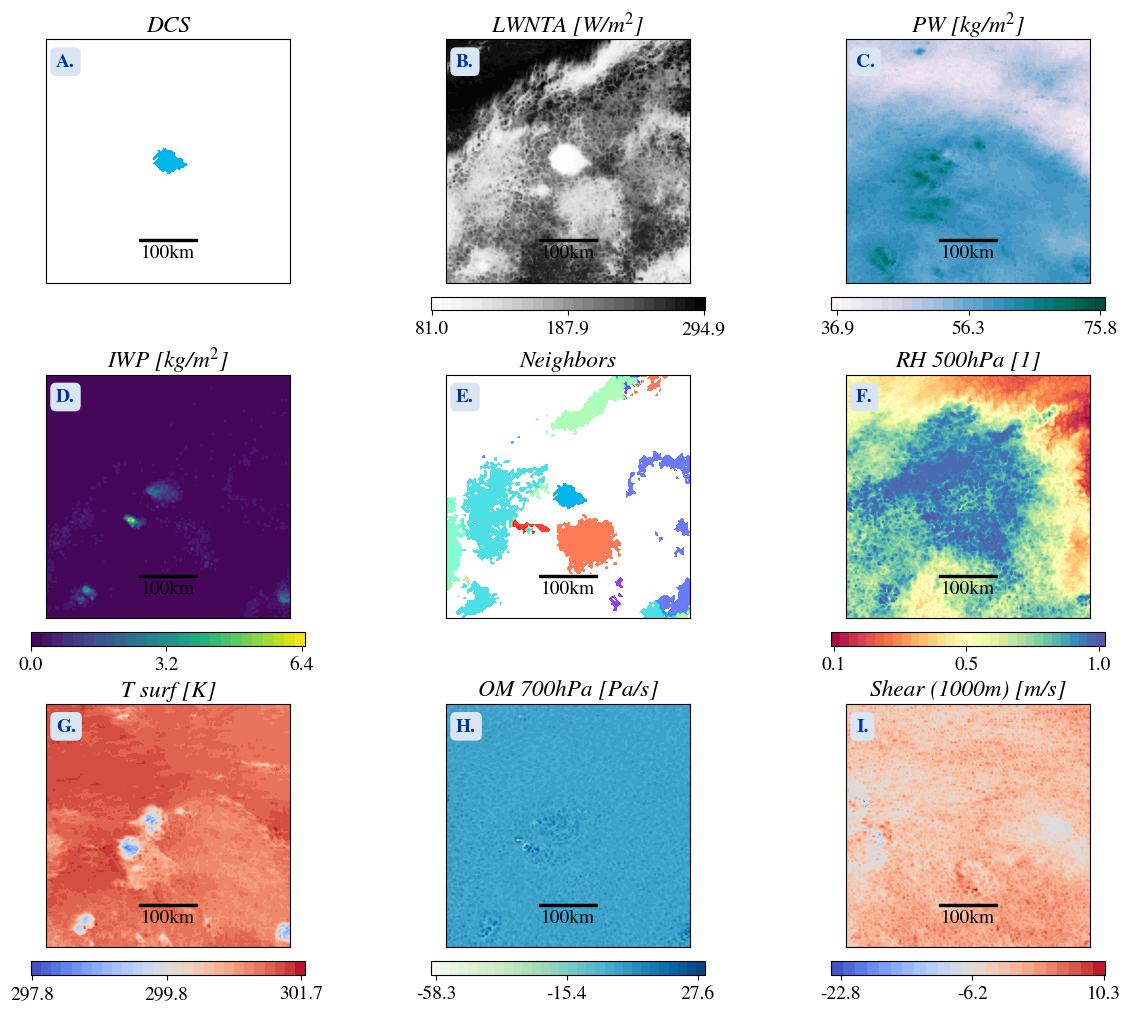

In [101]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

i_time = 2

# Create 3x3 subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 10), constrained_layout=True)

# Define colormap and title lists
cmap_list = ['rainbow',  'Greys', 'PuBuGn', 'viridis', 'rainbow', 
             'Spectral', 'coolwarm', 'GnBu', 'coolwarm', 'coolwarm']

title_list = ['DCS',  'LWNTA [W/m$^2$]', 'PW [kg/m$^2$]', 'IWP [kg/m$^2$]', 
              'Neighbors','RH 500hPa [1]', 'T surf [K]','OM 700hPa [Pa/s]',  
               'Shear (1000m) [m/s]' ]

# Loop over the 9 subplots
for i in range(9):
    k = i // 3  # Row index
    j = i % 3   # Column index

    # Add scalebar to each subplot
    scalebar = AnchoredSizeBar(ax[k, j].transData,
                               30, '100km', 'lower center', 
                               pad=1,
                               color='k',
                               frameon=False,
                               size_vertical=1,
                               )
    
    # Plot different maps
    if title_list[i] == 'Neighbors':
        map_X = X_all[i, i_time, :, :] % 10
        im = ax[k, j].contourf(map_X, 30, cmap=cmap_list[i], alpha=0.8)
        im2 = ax[k, j].contourf(X_all[0, i_time, :, :], 30, cmap=cmap_list[i])
    else:
        im = ax[k, j].contourf(X_all[i, i_time, :, :], 30, cmap=cmap_list[i])

    vmin_im, vmax_im = np.min(X_all[i, i_time, :, :]), np.max(X_all[i, i_time, :, :])
    t = np.linspace(vmin_im, vmax_im, 3)
    
    # Add scalebar, ticks, and titles
    ax[k, j].add_artist(scalebar)
    ax[k, j].set_xticks([])
    ax[k, j].set_yticks([])
    ax[k, j].set_title(title_list[i], fontstyle='italic')
    
    # Add colorbar for certain subplots
    if (title_list[i] != 'DCS') and (title_list[i] != 'Neighbors'):
        cb = fig.colorbar(im, ax=ax[k, j], orientation='horizontal', ticks=t, aspect=20, shrink=0.7, format='%.1f')
    
    ax[k, j].set_aspect('equal')

# Adding labels (A, B, C, ...) to subplots
labels = ['A.', 'B.', 'C.', 'D.', 'E.', 'F.', 'G.', 'H.', 'I.']
pnas_bg_color = '#d9e6f2'  # PNAS light blue color for background
pnas_text_color = '#0033a0'  # PNAS dark blue color for text

# Add labels to the subplots
for i in range(9):
    k = i // 3
    j = i % 3
    ax[k, j].text(
        0.04, 0.89, labels[i], 
        transform=ax[k, j].transAxes, 
        weight='bold',
        color=pnas_text_color,  # Text color
        bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3')  # Background color with padding
    )

# Path for saving the figure
#path_figures = '/home/b/b381993/DeepFate/figures_si'   
path_fig = os.path.join(path_figures, 'example_window_sys_variables.pdf')
# Save the figure (uncomment to save)
plt.savefig(path_fig)

plt.show()


In [102]:
import matplotlib
plt.rcParams.update({'font.size': 14})

In [103]:
from DeepFate.important_features.utils_important_features import get_datasets


train_dataset_raw = pd.read_csv('/work/bb1153/b381993/data/VERSION_MARCH_NEW_INTERPRETABLE/train_dataset.csv')
test_dataset_raw = pd.read_csv('/work/bb1153/b381993/data/VERSION_MARCH_NEW_INTERPRETABLE/test_dataset.csv')

print(len(train_dataset_raw), len(test_dataset_raw))


blacklist_exp = ['gradient_area', 'average_diameter', 'mcs_area']


dict_exp_gr = {
    'df_train': train_dataset_raw,
    'df_test': test_dataset_raw,
    'all_features': False,
    'one_features_name': 'gradient_area',
    'blacklist': blacklist_exp
}

dict_exp = {
    'df_train': train_dataset_raw,
    'df_test': test_dataset_raw,
    'all_features': True,
    'one_features_name': '',
    'blacklist': blacklist_exp
}

# Iterate over a range of timesteps for evaluation
#for nt_eval in range(1, 10):

# Get the processed training and test datasets
train_dataset_3, test_dataset_3 = get_datasets(
    all_features=dict_exp['all_features'],
    df_train=dict_exp['df_train'],
    df_test=dict_exp['df_test'],
    one_features_name=dict_exp['one_features_name'],
    blacklist=dict_exp['blacklist'],
    nb_timesteps=3
)

train_dataset_4, test_dataset_4 = get_datasets(
    all_features=dict_exp['all_features'],
    df_train=dict_exp['df_train'],
    df_test=dict_exp['df_test'],
    one_features_name=dict_exp['one_features_name'],
    blacklist=dict_exp['blacklist'],
    nb_timesteps=4)




y_train = train_dataset_raw['y_max_extend']
y_test = test_dataset_raw['y_max_extend']

51684 17229


In [104]:
import joblib

# Load the trained pipeline model (for example, 'pipeline_rf_1.pkl')
pipeline_lasso_3 = joblib.load('/home/b/b381993/DeepFate/models/pipeline_lasso_3.pkl')
pipeline_lasso_4 = joblib.load('/home/b/b381993/DeepFate/models/pipeline_lasso_4.pkl')

nb_timesteps=3
model_str='Lasso'


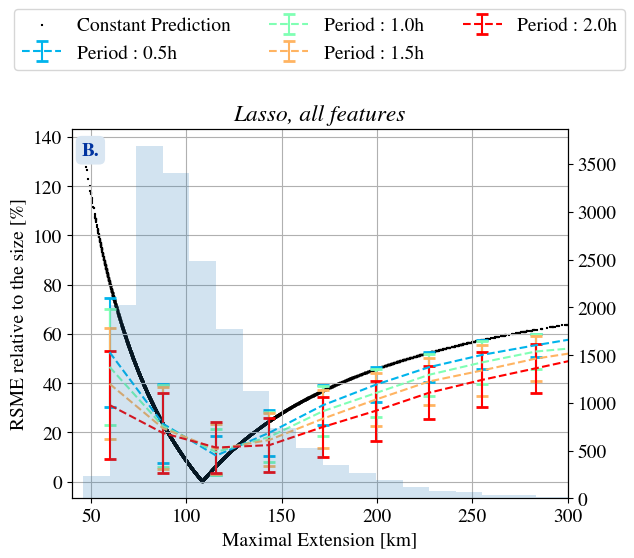

In [105]:
cmap=plt.get_cmap('rainbow',5)

model_str = 'Lasso'

fig, ax=plt.subplots()
ax2=plt.twinx(ax)

for nb_timesteps in [1,2,3,4]:

        #str_dict = f'{model_str}_{nb_timesteps}'
        pipeline_lasso = joblib.load(f'/home/b/b381993/DeepFate/models/pipeline_lasso_{nb_timesteps}.pkl')

        train_dataset, test_dataset = get_datasets(
                                            all_features=dict_exp['all_features'],
                                            df_train=dict_exp['df_train'],
                                            df_test=dict_exp['df_test'],
                                            one_features_name=dict_exp['one_features_name'],
                                            blacklist=dict_exp['blacklist'],
                                            nb_timesteps=nb_timesteps)

        y_preds = pipeline_lasso.predict(test_dataset)


        if nb_timesteps==1:
            im2=ax.scatter(y_test, 100*(np.sqrt((np.mean(y_test)-y_test)**2)/y_test), 
                            marker='+', c='k', s=1, label='Constant Prediction')
            ax2.hist(y_test, bins=40, alpha=0.2, color='tab:blue')

    
        yy = 100*(np.sqrt((y_preds-y_test)**2)/y_test)
        xx = y_test
        nbins = 20
        n, _ = np.histogram(xx, bins=nbins)
        sy, _ = np.histogram(xx, bins=nbins, weights=yy)
        sy2, _ = np.histogram(xx, bins=nbins, weights=yy*yy)
        mean = sy / n
        std = np.sqrt(sy2/n - mean*mean)

        ax.errorbar((_[1:] + _[:-1])/2, mean, yerr=std,fmt='--', capsize=4, capthick=2, color=cmap(nb_timesteps), label=f'Period : {nb_timesteps*0.5}h')
        
        ax.set_xlim(40,300)
        #ax.ylim(-5,80)
        ax.set_title('Lasso, all features', fontstyle='italic')
        ax.set_xlabel('Maximal Extension [km]')
        ax.set_ylabel('RSME relative to the size [%]')
        ax.legend(ncol=3, bbox_to_anchor=(0.5,1.35), loc= 'upper center')
        
        ax.grid(True)


# Assuming you have your axes already created as ax1, ax2, and ax3
labels = ['B.']
pnas_bg_color = '#d9e6f2'  # PNAS light blue color for background
pnas_text_color = '#0033a0'  # PNAS dark blue color for text

ax.text(
    0.02, 0.93, labels[0], 
    transform=ax.transAxes, 
    weight='bold',
    color=pnas_text_color,  # Text color
    bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3')  # Background color with padding
)


path_to_save = os.path.join(path_figures, 'figure_S5A.pdf')
plt.savefig(path_to_save)



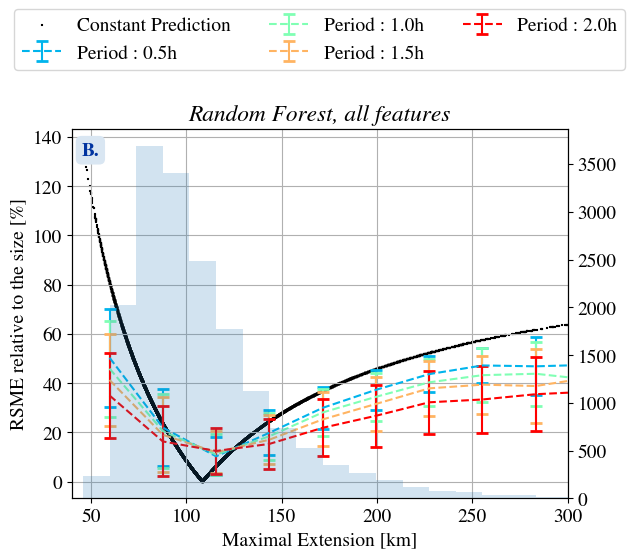

In [106]:
cmap=plt.get_cmap('rainbow',5)

model_str = 'Lasso'

fig, ax=plt.subplots()
ax2=plt.twinx(ax)

for nb_timesteps in [1,2,3,4]:

        #str_dict = f'{model_str}_{nb_timesteps}'
        pipeline_lasso = joblib.load(f'/home/b/b381993/DeepFate/models/pipeline_rf_{nb_timesteps}.pkl')

        train_dataset, test_dataset = get_datasets(
                                            all_features=dict_exp['all_features'],
                                            df_train=dict_exp['df_train'],
                                            df_test=dict_exp['df_test'],
                                            one_features_name=dict_exp['one_features_name'],
                                            blacklist=dict_exp['blacklist'],
                                            nb_timesteps=nb_timesteps)

        y_preds = pipeline_lasso.predict(test_dataset)


        if nb_timesteps==1:
            im2=ax.scatter(y_test, 100*(np.sqrt((np.mean(y_test)-y_test)**2)/y_test), 
                            marker='+', c='k', s=1, label='Constant Prediction')
            ax2.hist(y_test, bins=40, alpha=0.2, color='tab:blue')

    
        yy = 100*(np.sqrt((y_preds-y_test)**2)/y_test)
        xx = y_test
        nbins = 20
        n, _ = np.histogram(xx, bins=nbins)
        sy, _ = np.histogram(xx, bins=nbins, weights=yy)
        sy2, _ = np.histogram(xx, bins=nbins, weights=yy*yy)
        mean = sy / n
        std = np.sqrt(sy2/n - mean*mean)

        ax.errorbar((_[1:] + _[:-1])/2, mean, yerr=std,fmt='--', capsize=4, capthick=2, color=cmap(nb_timesteps), label=f'Period : {nb_timesteps*0.5}h')
        
        ax.set_xlim(40,300)
        #ax.ylim(-5,80)
        ax.set_title('Random Forest, all features', fontstyle='italic')
        ax.set_xlabel('Maximal Extension [km]')
        ax.set_ylabel('RSME relative to the size [%]')
        ax.legend(ncol=3, bbox_to_anchor=(0.5,1.35), loc= 'upper center')
        
        ax.grid(True)


# Assuming you have your axes already created as ax1, ax2, and ax3
labels = ['B.']
pnas_bg_color = '#d9e6f2'  # PNAS light blue color for background
pnas_text_color = '#0033a0'  # PNAS dark blue color for text

ax.text(
    0.02, 0.93, labels[0], 
    transform=ax.transAxes, 
    weight='bold',
    color=pnas_text_color,  # Text color
    bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3')  # Background color with padding
)


path_to_save = os.path.join(path_figures, 'figure_S5B.pdf')
plt.savefig(path_to_save)



In [107]:

train_dataset, test_dataset = get_datasets(
                                        all_features=dict_exp_gr['all_features'],
                                        df_train=dict_exp_gr['df_train'],
                                        df_test=dict_exp_gr['df_test'],
                                        one_features_name=dict_exp_gr['one_features_name'],
                                        blacklist=dict_exp_gr['blacklist'],
                                        nb_timesteps = 2)

In [108]:
test_dataset.columns,  dict_exp_gr['one_features_name']

(Index(['gradient_area_time_0', 'gradient_area_time_1'], dtype='object'),
 'gradient_area')

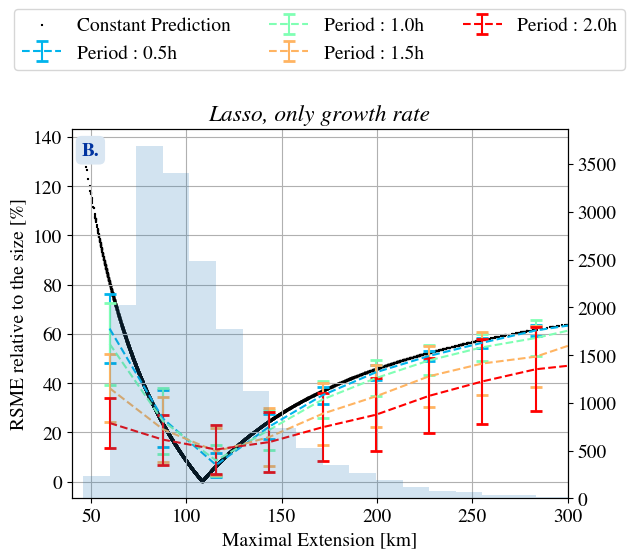

In [109]:
cmap=plt.get_cmap('rainbow',5)

model_str = 'Lasso'

fig, ax=plt.subplots()
ax2=plt.twinx(ax)


for nb_timesteps in [1,2,3,4]:

        #str_dict = f'{model_str}_{nb_timesteps}'
        pipeline = joblib.load(f'/home/b/b381993/DeepFate/models/pipeline_lasso_only_growth_rate_{nb_timesteps}.pkl')

        train_dataset, test_dataset = get_datasets(
                                            all_features=dict_exp_gr['all_features'],
                                            df_train=dict_exp_gr['df_train'],
                                            df_test=dict_exp_gr['df_test'],
                                            one_features_name=dict_exp_gr['one_features_name'],
                                            blacklist=dict_exp_gr['blacklist'],
                                            nb_timesteps=nb_timesteps)

        y_preds = pipeline.predict(test_dataset)


        if nb_timesteps==1:
            im2=ax.scatter(y_test, 100*(np.sqrt((np.mean(y_test)-y_test)**2)/y_test), 
                            marker='+', c='k', s=1, label='Constant Prediction')
            ax2.hist(y_test, bins=40, alpha=0.2, color='tab:blue')

    
        yy = 100*(np.sqrt((y_preds-y_test)**2)/y_test)
        xx = y_test
        nbins = 20
        n, _ = np.histogram(xx, bins=nbins)
        sy, _ = np.histogram(xx, bins=nbins, weights=yy)
        sy2, _ = np.histogram(xx, bins=nbins, weights=yy*yy)
        mean = sy / n
        std = np.sqrt(sy2/n - mean*mean)

        ax.errorbar((_[1:] + _[:-1])/2, mean, yerr=std,fmt='--', capsize=4, capthick=2, color=cmap(nb_timesteps), label=f'Period : {nb_timesteps*0.5}h')
        
        ax.set_xlim(40,300)
        #ax.ylim(-5,80)
        ax.set_title('Lasso, only growth rate', fontstyle='italic')
        ax.set_xlabel('Maximal Extension [km]')
        ax.set_ylabel('RSME relative to the size [%]')
        ax.legend(ncol=3, bbox_to_anchor=(0.5,1.35), loc= 'upper center')
        
        ax.grid(True)


# Assuming you have your axes already created as ax1, ax2, and ax3
labels = ['B.']
pnas_bg_color = '#d9e6f2'  # PNAS light blue color for background
pnas_text_color = '#0033a0'  # PNAS dark blue color for text

ax.text(
    0.02, 0.93, labels[0], 
    transform=ax.transAxes, 
    weight='bold',
    color=pnas_text_color,  # Text color
    bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3')  # Background color with padding
)


path_to_save = os.path.join(path_figures, 'figure_S5C.pdf')
plt.savefig(path_to_save)



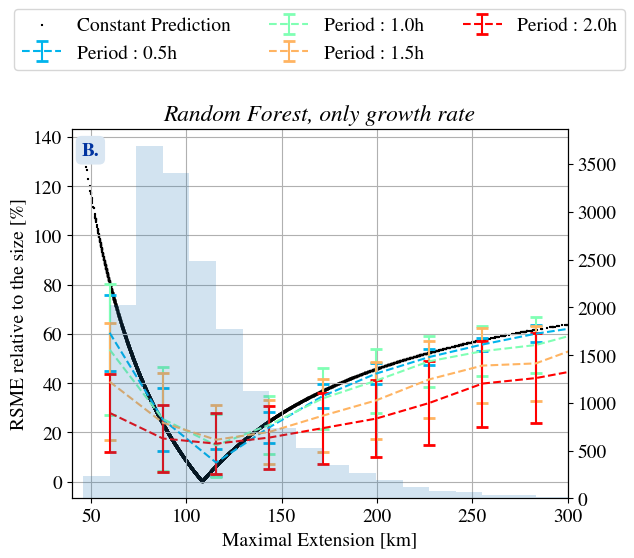

In [110]:
cmap=plt.get_cmap('rainbow',5)

model_str = 'Lasso'

fig, ax=plt.subplots()
ax2=plt.twinx(ax)


for nb_timesteps in [1,2,3,4]:

        #str_dict = f'{model_str}_{nb_timesteps}'
        pipeline = joblib.load(f'/home/b/b381993/DeepFate/models/pipeline_rf_only_growth_rate_{nb_timesteps}.pkl')

        train_dataset, test_dataset = get_datasets(
                                            all_features=dict_exp_gr['all_features'],
                                            df_train=dict_exp_gr['df_train'],
                                            df_test=dict_exp_gr['df_test'],
                                            one_features_name=dict_exp_gr['one_features_name'],
                                            blacklist=dict_exp_gr['blacklist'],
                                            nb_timesteps=nb_timesteps)

        y_preds = pipeline.predict(test_dataset)


        if nb_timesteps==1:
            im2=ax.scatter(y_test, 100*(np.sqrt((np.mean(y_test)-y_test)**2)/y_test), 
                            marker='+', c='k', s=1, label='Constant Prediction')
            ax2.hist(y_test, bins=40, alpha=0.2, color='tab:blue')

    
        yy = 100*(np.sqrt((y_preds-y_test)**2)/y_test)
        xx = y_test
        nbins = 20
        n, _ = np.histogram(xx, bins=nbins)
        sy, _ = np.histogram(xx, bins=nbins, weights=yy)
        sy2, _ = np.histogram(xx, bins=nbins, weights=yy*yy)
        mean = sy / n
        std = np.sqrt(sy2/n - mean*mean)

        ax.errorbar((_[1:] + _[:-1])/2, mean, yerr=std,fmt='--', capsize=4, capthick=2, color=cmap(nb_timesteps), label=f'Period : {nb_timesteps*0.5}h')
        
        ax.set_xlim(40,300)
        #ax.ylim(-5,80)
        ax.set_title('Random Forest, only growth rate', fontstyle='italic')
        ax.set_xlabel('Maximal Extension [km]')
        ax.set_ylabel('RSME relative to the size [%]')
        ax.legend(ncol=3, bbox_to_anchor=(0.5,1.35), loc= 'upper center')
        
        ax.grid(True)


# Assuming you have your axes already created as ax1, ax2, and ax3
labels = ['B.']
pnas_bg_color = '#d9e6f2'  # PNAS light blue color for background
pnas_text_color = '#0033a0'  # PNAS dark blue color for text

ax.text(
    0.02, 0.93, labels[0], 
    transform=ax.transAxes, 
    weight='bold',
    color=pnas_text_color,  # Text color
    bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3')  # Background color with padding
)


path_to_save = os.path.join(path_figures, 'figure_S5C.pdf')
plt.savefig(path_to_save)



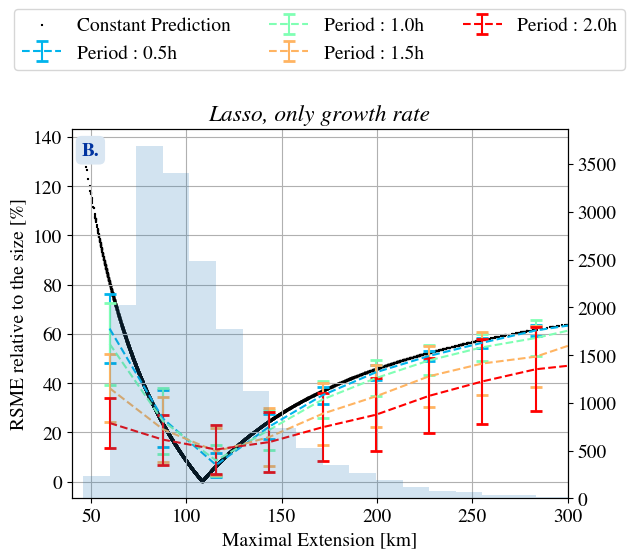

In [112]:
cmap=plt.get_cmap('rainbow',5)

model_str = 'Lasso'

fig, ax=plt.subplots()
ax2=plt.twinx(ax)


for nb_timesteps in [1,2,3,4]:

        #str_dict = f'{model_str}_{nb_timesteps}'
        pipeline = joblib.load(f'/home/b/b381993/DeepFate/models/pipeline_lasso_only_growth_rate_{nb_timesteps}.pkl')

        train_dataset, test_dataset = get_datasets(
                                            all_features=dict_exp_gr['all_features'],
                                            df_train=dict_exp_gr['df_train'],
                                            df_test=dict_exp_gr['df_test'],
                                            one_features_name=dict_exp_gr['one_features_name'],
                                            blacklist=dict_exp_gr['blacklist'],
                                            nb_timesteps=nb_timesteps)

        y_preds = pipeline.predict(test_dataset)


        if nb_timesteps==1:
            im2=ax.scatter(y_test, 100*(np.sqrt((np.mean(y_test)-y_test)**2)/y_test), 
                            marker='+', c='k', s=1, label='Constant Prediction')
            ax2.hist(y_test, bins=40, alpha=0.2, color='tab:blue')

    
        yy = 100*(np.sqrt((y_preds-y_test)**2)/y_test)
        xx = y_test
        nbins = 20
        n, _ = np.histogram(xx, bins=nbins)
        sy, _ = np.histogram(xx, bins=nbins, weights=yy)
        sy2, _ = np.histogram(xx, bins=nbins, weights=yy*yy)
        mean = sy / n
        std = np.sqrt(sy2/n - mean*mean)

        ax.errorbar((_[1:] + _[:-1])/2, mean, yerr=std,fmt='--', capsize=4, capthick=2, color=cmap(nb_timesteps), label=f'Period : {nb_timesteps*0.5}h')
        
        ax.set_xlim(40,300)
        #ax.ylim(-5,80)
        ax.set_title('Lasso, only growth rate', fontstyle='italic')
        ax.set_xlabel('Maximal Extension [km]')
        ax.set_ylabel('RSME relative to the size [%]')
        ax.legend(ncol=3, bbox_to_anchor=(0.5,1.35), loc= 'upper center')
        
        ax.grid(True)


# Assuming you have your axes already created as ax1, ax2, and ax3
labels = ['B.']
pnas_bg_color = '#d9e6f2'  # PNAS light blue color for background
pnas_text_color = '#0033a0'  # PNAS dark blue color for text

ax.text(
    0.02, 0.93, labels[0], 
    transform=ax.transAxes, 
    weight='bold',
    color=pnas_text_color,  # Text color
    bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3')  # Background color with padding
)


path_to_save = os.path.join(path_figures, 'figure_S5D.pdf')
plt.savefig(path_to_save)



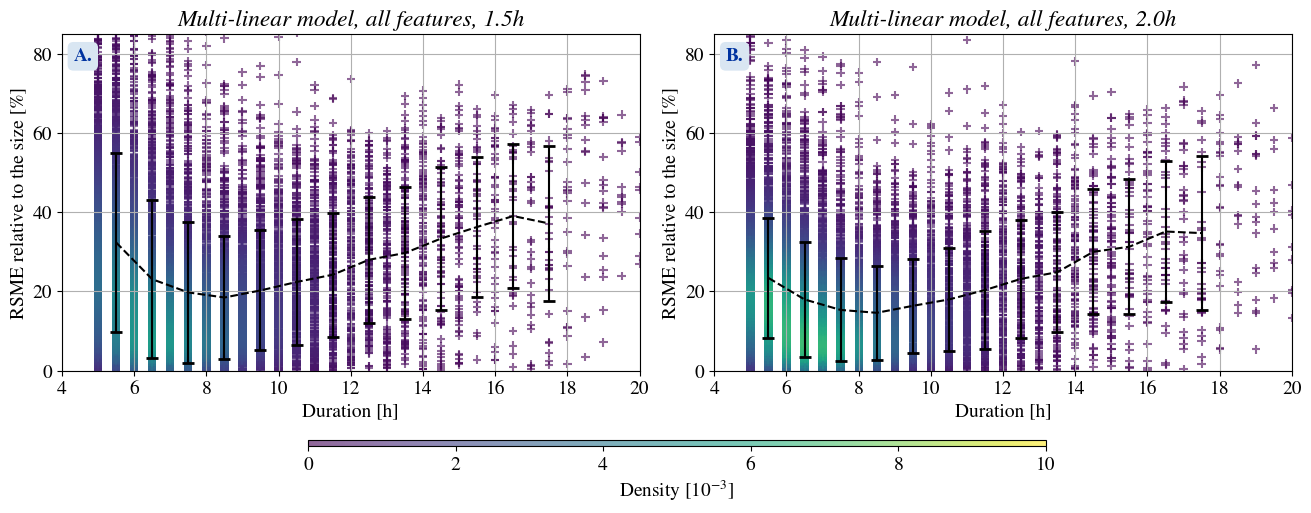

In [113]:
folder_path = '/work/bb1153/b381993/data/FINAL_VERSION_new/'

folder_path_preds = os.path.join(folder_path, 'saved_preds')
path_to_preds_df = os.path.join(folder_path_preds, 'preds_all_models_all_features.parquet')
df_all_features=pd.read_parquet(path_to_preds_df)

cmap=plt.get_cmap('rainbow',5)
fig, ax = plt.subplots(1, 2, figsize=(13,5), constrained_layout=True)


model_str = 'Lasso'

for i,nb_timesteps in enumerate([3,4]):


    #str_dict = f'{model_str}_{nb_timesteps}'
    pipeline = joblib.load(f'/home/b/b381993/DeepFate/models/pipeline_rf_only_growth_rate_{nb_timesteps}.pkl')

    train_dataset, test_dataset = get_datasets(
                                        all_features=dict_exp_gr['all_features'],
                                        df_train=dict_exp_gr['df_train'],
                                        df_test=dict_exp_gr['df_test'],
                                        one_features_name=dict_exp_gr['one_features_name'],
                                        blacklist=dict_exp_gr['blacklist'],
                                        nb_timesteps=nb_timesteps)

    y_preds = pipeline.predict(test_dataset)
    
    x=100*(np.sqrt((y_preds-y_test)**2)/y_test)
    y = test_dataset_raw['y_duration']
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    
    yy = 100*(np.sqrt((y_preds-y_test)**2)/y_test)
    xx = test_dataset_raw['y_duration']
    nbins = np.arange(4,19,1)
    n, _ = np.histogram(xx, bins=nbins)
    sy, _ = np.histogram(xx, bins=nbins, weights=yy)
    sy2, _ = np.histogram(xx, bins=nbins, weights=yy*yy)
    mean = sy / n
    std = np.sqrt(sy2/n - mean*mean)
    
    im=ax[i].scatter(test_dataset_raw['y_duration'], 100*(np.sqrt((y_preds-y_test)**2)/y_test), marker='+', c=1000*z, alpha=0.6, vmin=0, vmax=10)
    ax[i].errorbar((_[1:] + _[:-1])/2, mean, yerr=std,fmt='--', capsize=4, capthick=2, color='k')
    
    #plt.clim(0,0.7)
    ax[i].set_xlim(4,20)
    ax[i].set_ylim(0,85)
    ax[i].set_title(f'Multi-linear model, all features, {nb_timesteps/2}h', fontstyle='italic')
    ax[i].set_xlabel('Duration [h]')
    ax[i].set_ylabel('RSME relative to the size [%]')
    ax[i].grid(True)

cb=fig.colorbar(im, ax=ax.ravel().tolist(), shrink=0.6, orientation='horizontal', aspect=110, label=r'Density [$10^{-3}$]')

# Assuming you have your axes already created as ax1, ax2, and ax3
labels = ['A.', 'B.']
pnas_bg_color = '#d9e6f2'  # PNAS light blue color for background
pnas_text_color = '#0033a0'  # PNAS dark blue color for text

for i, ax_subi in enumerate([ax[0],ax[1]]):
    ax_subi.text(
        0.02, 0.92, labels[i], 
        transform=ax_subi.transAxes, 
        weight='bold',
        color=pnas_text_color,  # Text color
        bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3')  # Background color with padding
    )



path_to_save = os.path.join(path_figures, 'figure_S6.pdf')
plt.savefig(path_to_save)

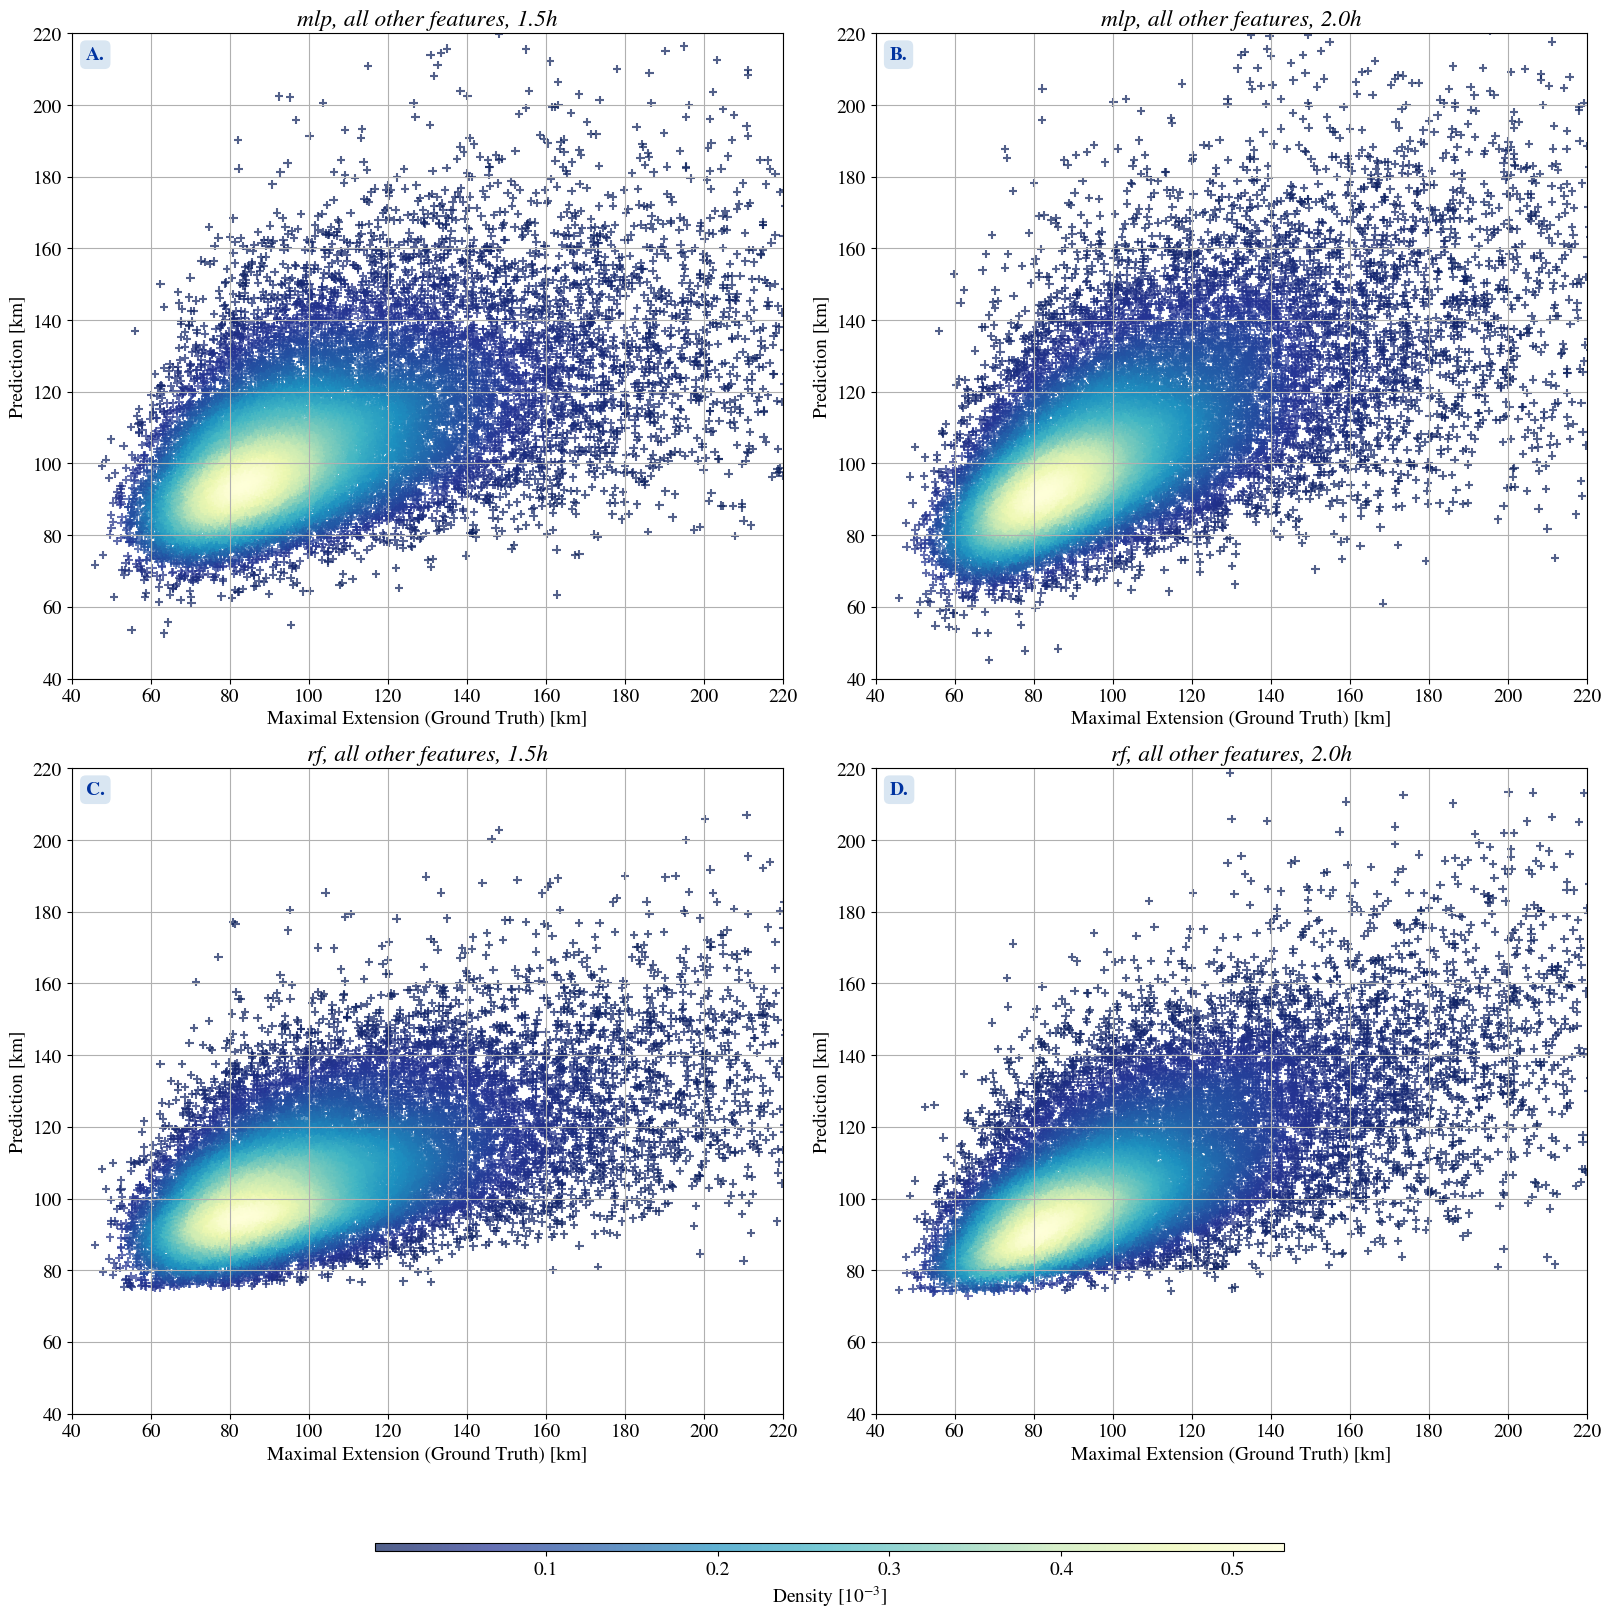

In [115]:

fig, ax = plt.subplots(2, 2, figsize=(16,16), constrained_layout=True)
mode = 'all other features'
for i_model, model_str in enumerate(['mlp', 'rf']):
    for i_mode,nb_timesteps in enumerate([3, 4]):
            
        pipeline = joblib.load(f'/home/b/b381993/DeepFate/models/pipeline_{model_str}_{nb_timesteps}.pkl')

        train_dataset, test_dataset = get_datasets(
                                            all_features=dict_exp['all_features'],
                                            df_train=dict_exp['df_train'],
                                            df_test=dict_exp['df_test'],
                                            one_features_name=dict_exp['one_features_name'],
                                            blacklist=dict_exp['blacklist'],
                                            nb_timesteps=nb_timesteps)

        y_preds = pipeline.predict(test_dataset)

        x=y_preds
        y = y_test
    
        xy = np.vstack([x,y])
        xy=np.array(xy)
        z = gaussian_kde(xy)(xy)
    
    
        im = ax[i_model, i_mode].scatter( y_test,  y_preds, marker = '+', c =1000*z, alpha=0.7, cmap='YlGnBu_r')
    
        ax[i_model, i_mode].set_xlim(40,220)
        ax[i_model, i_mode].set_ylim(40,220)
        ax[i_model, i_mode].set_title(f'{model_str}, {mode}, {nb_timesteps/2}h', fontstyle='italic')
        ax[i_model, i_mode].set_xlabel('Maximal Extension (Ground Truth) [km]')
        ax[i_model, i_mode].set_ylabel('Prediction [km]')
        ax[i_model, i_mode].grid(True)


cb=fig.colorbar(im, ax=ax.ravel().tolist(), shrink=0.6, orientation='horizontal', aspect=110, label=r'Density [$10^{-3}$]')

# Assuming you have your axes already created as ax1, ax2, and ax3
labels = ['A.', 'B.', 'C.', 'D.']
pnas_bg_color = '#d9e6f2'  # PNAS light blue color for background
pnas_text_color = '#0033a0'  # PNAS dark blue color for text

for i, ax_subi in enumerate([ax[0,0], ax[0,1], ax[1,0], ax[1,1]]):
    ax_subi.text(
        0.02, 0.96, labels[i], 
        transform=ax_subi.transAxes, 
        weight='bold',
        color=pnas_text_color,  # Text color
        bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3')  # Background color with padding
    )



path_to_save = os.path.join(path_figures, 'figure_S4.pdf')
plt.savefig(path_to_save)

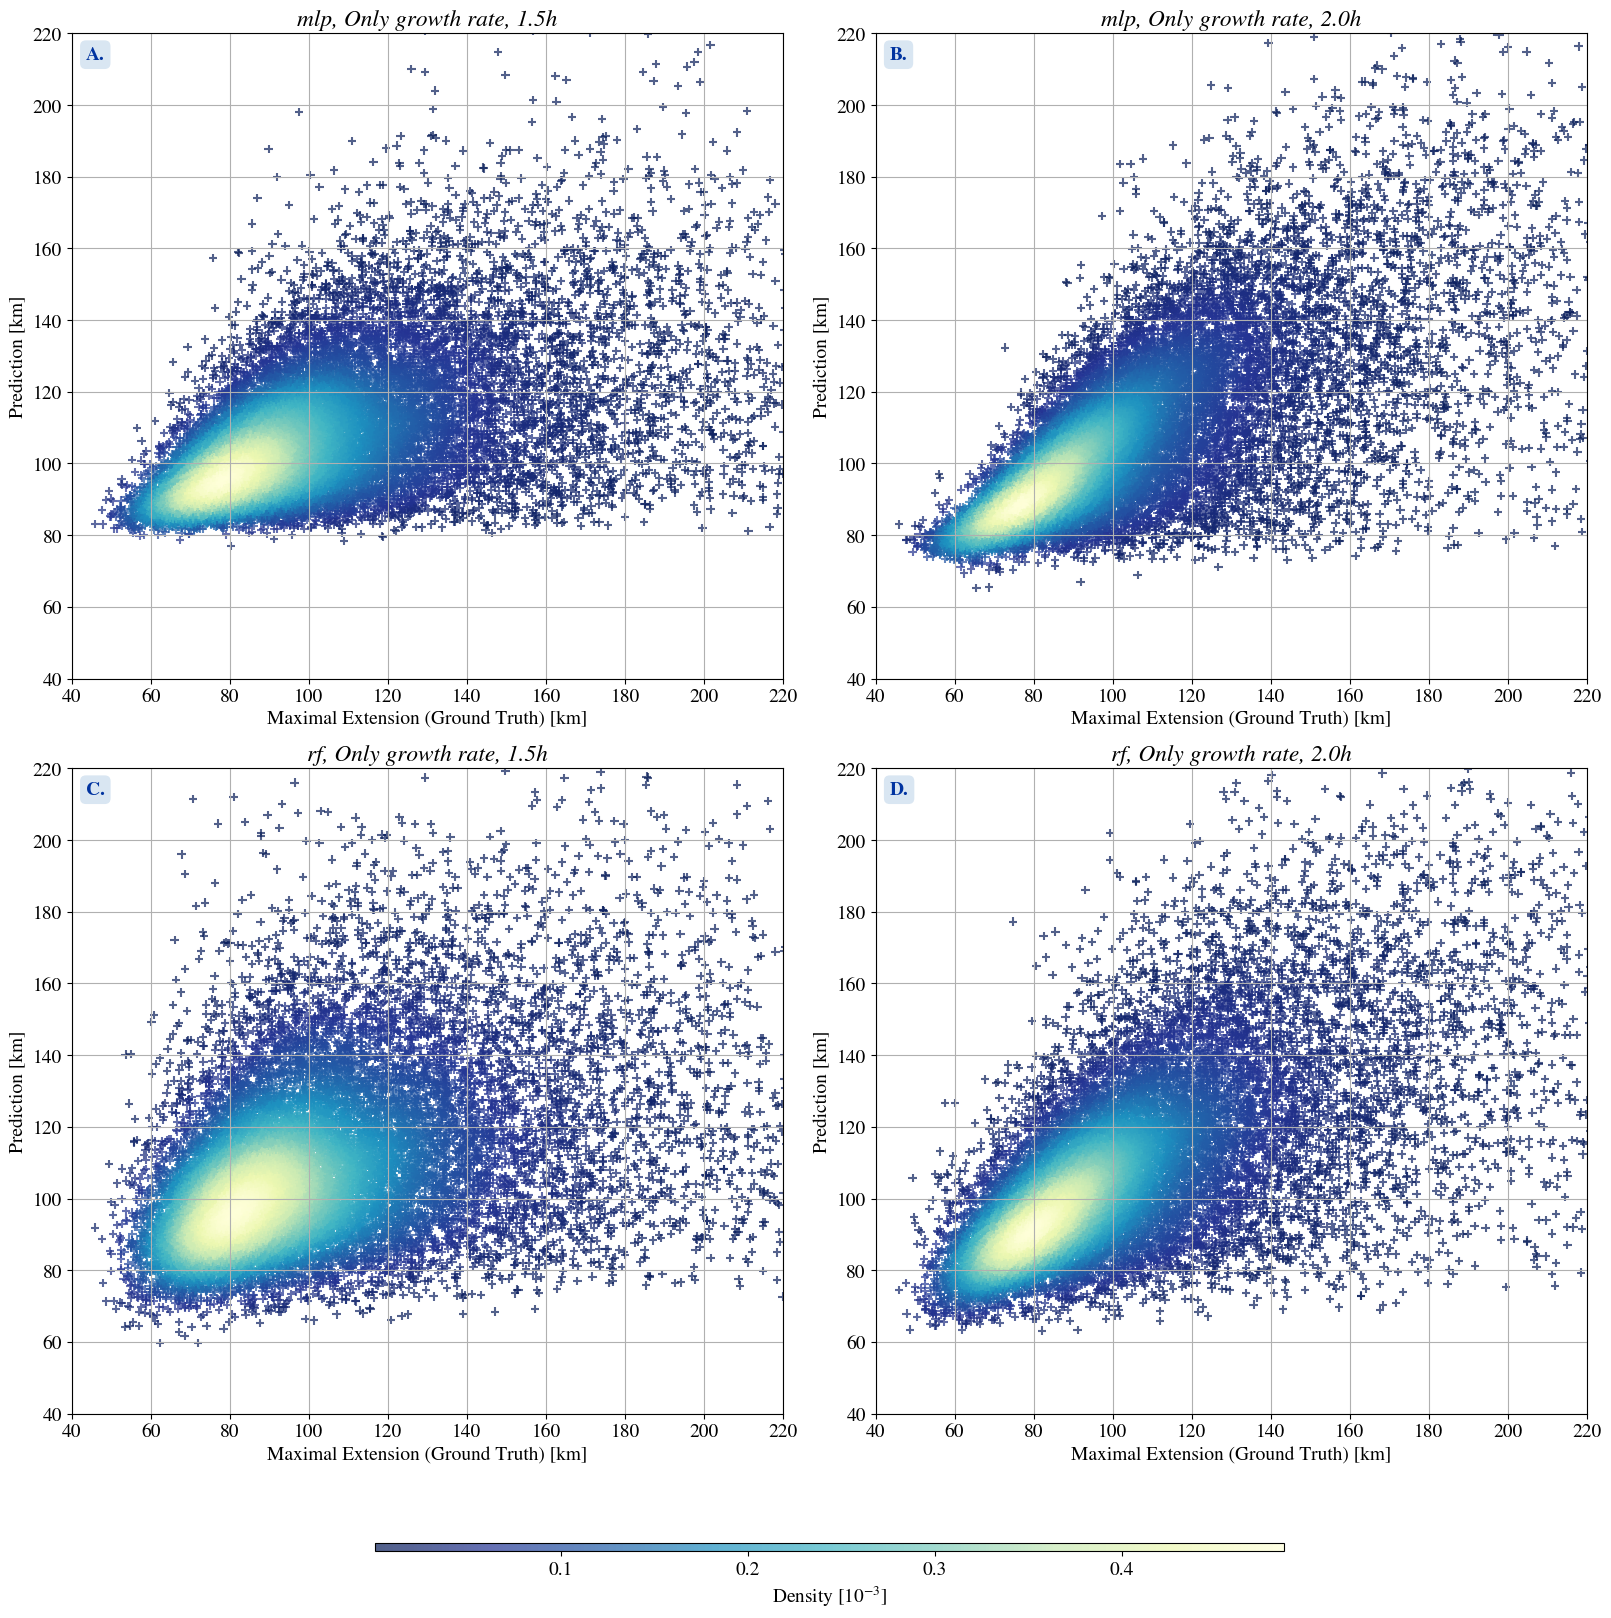

In [116]:

fig, ax = plt.subplots(2, 2, figsize=(16,16), constrained_layout=True)
mode = 'Only growth rate'
for i_model, model_str in enumerate(['mlp', 'rf']):
    for i_mode,nb_timesteps in enumerate([3, 4]):
            
        pipeline = joblib.load(f'/home/b/b381993/DeepFate/models/pipeline_{model_str}_only_growth_rate_{nb_timesteps}.pkl')

        train_dataset, test_dataset = get_datasets(
                                            all_features=dict_exp_gr['all_features'],
                                            df_train=dict_exp_gr['df_train'],
                                            df_test=dict_exp_gr['df_test'],
                                            one_features_name=dict_exp_gr['one_features_name'],
                                            blacklist=dict_exp_gr['blacklist'],
                                            nb_timesteps=nb_timesteps)

        y_preds = pipeline.predict(test_dataset)

        x=y_preds
        y = y_test
    
        xy = np.vstack([x,y])
        xy=np.array(xy)
        z = gaussian_kde(xy)(xy)
    
    
        im = ax[i_model, i_mode].scatter( y_test,  y_preds, marker = '+', c =1000*z, alpha=0.7, cmap='YlGnBu_r')
    
        ax[i_model, i_mode].set_xlim(40,220)
        ax[i_model, i_mode].set_ylim(40,220)
        ax[i_model, i_mode].set_title(f'{model_str}, {mode}, {nb_timesteps/2}h', fontstyle='italic')
        ax[i_model, i_mode].set_xlabel('Maximal Extension (Ground Truth) [km]')
        ax[i_model, i_mode].set_ylabel('Prediction [km]')
        ax[i_model, i_mode].grid(True)


cb=fig.colorbar(im, ax=ax.ravel().tolist(), shrink=0.6, orientation='horizontal', aspect=110, label=r'Density [$10^{-3}$]')

# Assuming you have your axes already created as ax1, ax2, and ax3
labels = ['A.', 'B.', 'C.', 'D.']
pnas_bg_color = '#d9e6f2'  # PNAS light blue color for background
pnas_text_color = '#0033a0'  # PNAS dark blue color for text

for i, ax_subi in enumerate([ax[0,0], ax[0,1], ax[1,0], ax[1,1]]):
    ax_subi.text(
        0.02, 0.96, labels[i], 
        transform=ax_subi.transAxes, 
        weight='bold',
        color=pnas_text_color,  # Text color
        bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3')  # Background color with padding
    )



path_to_save = os.path.join(path_figures, 'figure_S4_bis.pdf')
plt.savefig(path_to_save)

In [117]:
df_names = pd.read_csv('/home/b/b381993/DeepFate/notebooks/name_dict_new_var.csv')


In [118]:
from DeepFate.important_features.utils_important_features import get_features_importance_pipeline, get_sys_env_terms

features_selected_names, values_features, index_argsort = get_features_importance_pipeline(pipeline_path='/home/b/b381993/DeepFate/models/pipeline_lasso_3.pkl',
                                                                                            model_str='lasso',
                                                                                              df_train=train_dataset_3)

In [119]:
features_selected_names[:15]

Index(['std_under_cloud_var_6_time_2', 'std_everywhere_var_6_time_2',
       'migration_dist_time_2', 'mean_under_cloud_var_1_time_2',
       'eccentricity_172_time_1', 'mean_everywhere_var_6_time_2',
       'std_under_cloud_var_17_time_2', 'mean_everywhere_var_9_time_1',
       'mean_under_cloud_var_12_time_2', 'mean_under_cloud_var_4_time_2',
       'mean_everywhere_var_1_time_2', 'mean_under_cloud_var_3_time_2',
       'std_under_cloud_var_1_time_0', 'std_under_cloud_var_4_time_0',
       'std_under_cloud_var_14_time_0'],
      dtype='object')

In [120]:
features_selected_names_rf, values_features_rf, index_argsort_rf = get_features_importance_pipeline(pipeline_path='/home/b/b381993/DeepFate/models/pipeline_rf_3.pkl',
                                                                                            model_str='rf',
                                                                                              df_train=train_dataset_3)

In [121]:
features_selected_names_rf[:15]

Index(['std_everywhere_var_6_time_2', 'std_under_cloud_var_6_time_2',
       'migration_dist_time_2', 'migration_dist_time_1',
       'mean_everywhere_var_6_time_2', 'eccentricity_172_time_1',
       'mean_under_cloud_var_1_time_2', ' mean_interaction_power_time_2',
       'mean_everywhere_var_1_time_2', 'std_under_cloud_var_2_time_2',
       'std_under_cloud_var_5_time_2', 'std_everywhere_var_16_time_2',
       'std_everywhere_var_1_time_2', 'mean_under_cloud_var_2_time_2',
       'std_under_cloud_var_17_time_2'],
      dtype='object')

In [132]:
new_features_selected_names_lasso= [df_names[df_names['Old Name']==features_selected_names[i]]['Name Plot'].values[0] for i in range(len(features_selected_names))]
new_features_selected_names_rf= [df_names[df_names['Old Name']==features_selected_names_rf[i]]['Name Plot'].values[0] for i in range(len(features_selected_names_rf))]


In [126]:
def plot_feature_importance_comparison(features_selected_names_lasso, values_features_lasso,
                                       features_selected_names_rf, values_features_rf, top_n=15):
    # Select the top 15 features for both Lasso and RF
    features_lasso_top15 = features_selected_names_lasso[:top_n]
    values_lasso_top15 = values_features_lasso[:top_n]
    
    features_rf_top15 = features_selected_names_rf[:top_n]
    values_rf_top15 = values_features_rf[:top_n]
    
    # Normalize the feature importance values (scale to [0, 1])
    values_lasso_top15 = values_lasso_top15 / np.max(values_lasso_top15)
    values_rf_top15 = values_rf_top15 / np.max(values_rf_top15)

    # Get a union of the feature names from both models (to have consistent labels)
    feature_names_union = list(set(features_lasso_top15).union(set(features_rf_top15)))
    feature_names_union.sort()  # Sort the features alphabetically for clarity

    # Create arrays for feature values corresponding to the union of features
    values_lasso_union = [values_lasso_top15[features_lasso_top15.index(f)] if f in features_lasso_top15 else 0 for f in feature_names_union]
    values_rf_union = [values_rf_top15[features_rf_top15.index(f)] if f in features_rf_top15 else 0 for f in feature_names_union]

    # Identify common features between the two models
    common_features = set(features_lasso_top15).intersection(set(features_rf_top15))
    
    # Set up the bar plot
    x = np.arange(len(feature_names_union))  # The label locations
    width = 0.35  # Width of the bars
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot Lasso feature importances
    rects1 = ax.bar(x - width/2, values_lasso_union, width, label='Lasso',
                    color='tab:orange', hatch=['' if f in common_features else '//'
                                           for f in feature_names_union])
    
    # Plot Random Forest feature importances
    rects2 = ax.bar(x + width/2, values_rf_union, width, label='Random Forest',
                    color='tab:blue', hatch=['' if f in common_features else '\\\\'
                                         for f in feature_names_union])
    
    
    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel('Features')
    ax.set_ylabel('Normalized Feature Importance')
    ax.set_title('Comparison of Normalized Feature Importance between Lasso and Random Forest')
    ax.set_xticks(x)
    ax.set_xticklabels(feature_names_union, rotation=90)
    ax.legend()
    
    # Highlight common features in the title or annotation
    ax.text(0.5, 0.85, 'Striped Bars = Not shared Features', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='k', fontsize=14, bbox=dict(facecolor='white', alpha=0.5))
    plt.grid()
    # Display the plot
    plt.tight_layout()

    path_to_save = os.path.join(path_figures, 'figure_S7.pdf')
    plt.savefig(path_to_save)
    plt.show()

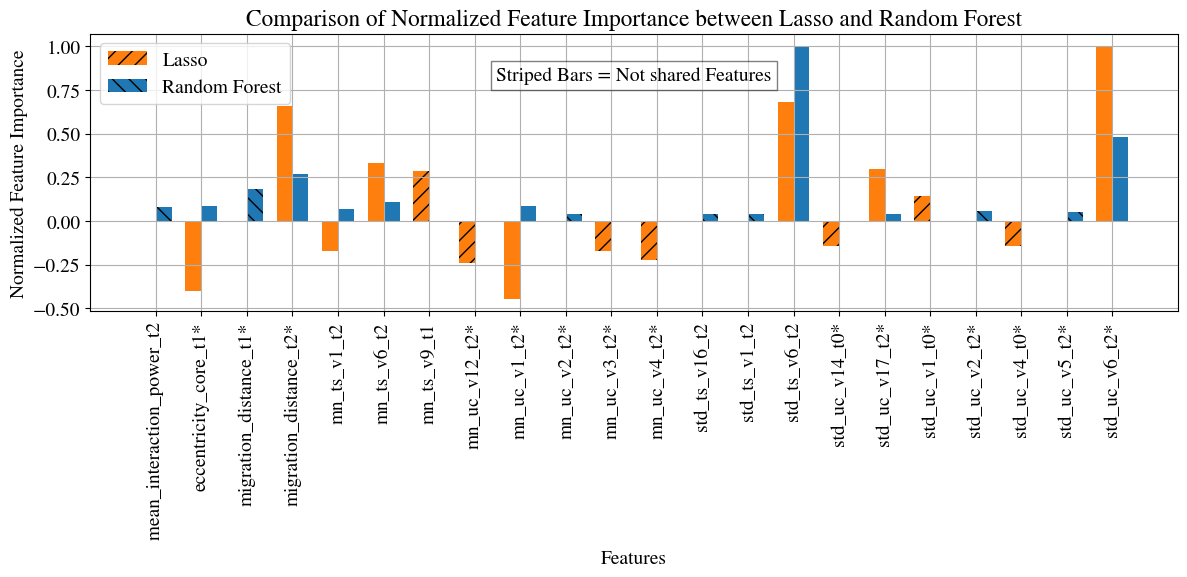

In [127]:
# Example usage
plot_feature_importance_comparison(new_features_selected_names_lasso, values_features,
                                   new_features_selected_names_rf, values_features_rf*100)

In [128]:
values_features_rf

array([2.73824105e-01, 1.31538079e-01, 7.33022494e-02, 5.07673314e-02,
       3.07248205e-02, 2.39183119e-02, 2.36115654e-02, 2.27836614e-02,
       1.97089692e-02, 1.52435870e-02, 1.43517776e-02, 1.18839911e-02,
       1.10576853e-02, 1.09211635e-02, 1.07342030e-02, 1.05964991e-02,
       1.05256386e-02, 9.79487773e-03, 9.77629175e-03, 9.49648917e-03,
       9.34757081e-03, 9.26115248e-03, 8.97357036e-03, 8.81799637e-03,
       8.17202844e-03, 8.07451252e-03, 7.74675369e-03, 7.62253185e-03,
       7.39970758e-03, 7.37558446e-03, 7.20620164e-03, 7.16312310e-03,
       6.85410157e-03, 6.60531996e-03, 6.45417740e-03, 6.39852596e-03,
       6.36666215e-03, 5.78879497e-03, 5.78577054e-03, 5.59824769e-03,
       5.51569512e-03, 5.27541845e-03, 5.03470494e-03, 4.88209017e-03,
       4.76136814e-03, 4.70049175e-03, 4.43802443e-03, 4.36551196e-03,
       3.87817927e-03, 3.83386718e-03, 3.76320483e-03, 3.42887933e-03,
       3.36078417e-03, 3.28250194e-03, 3.22113120e-03, 3.11826499e-03,
      

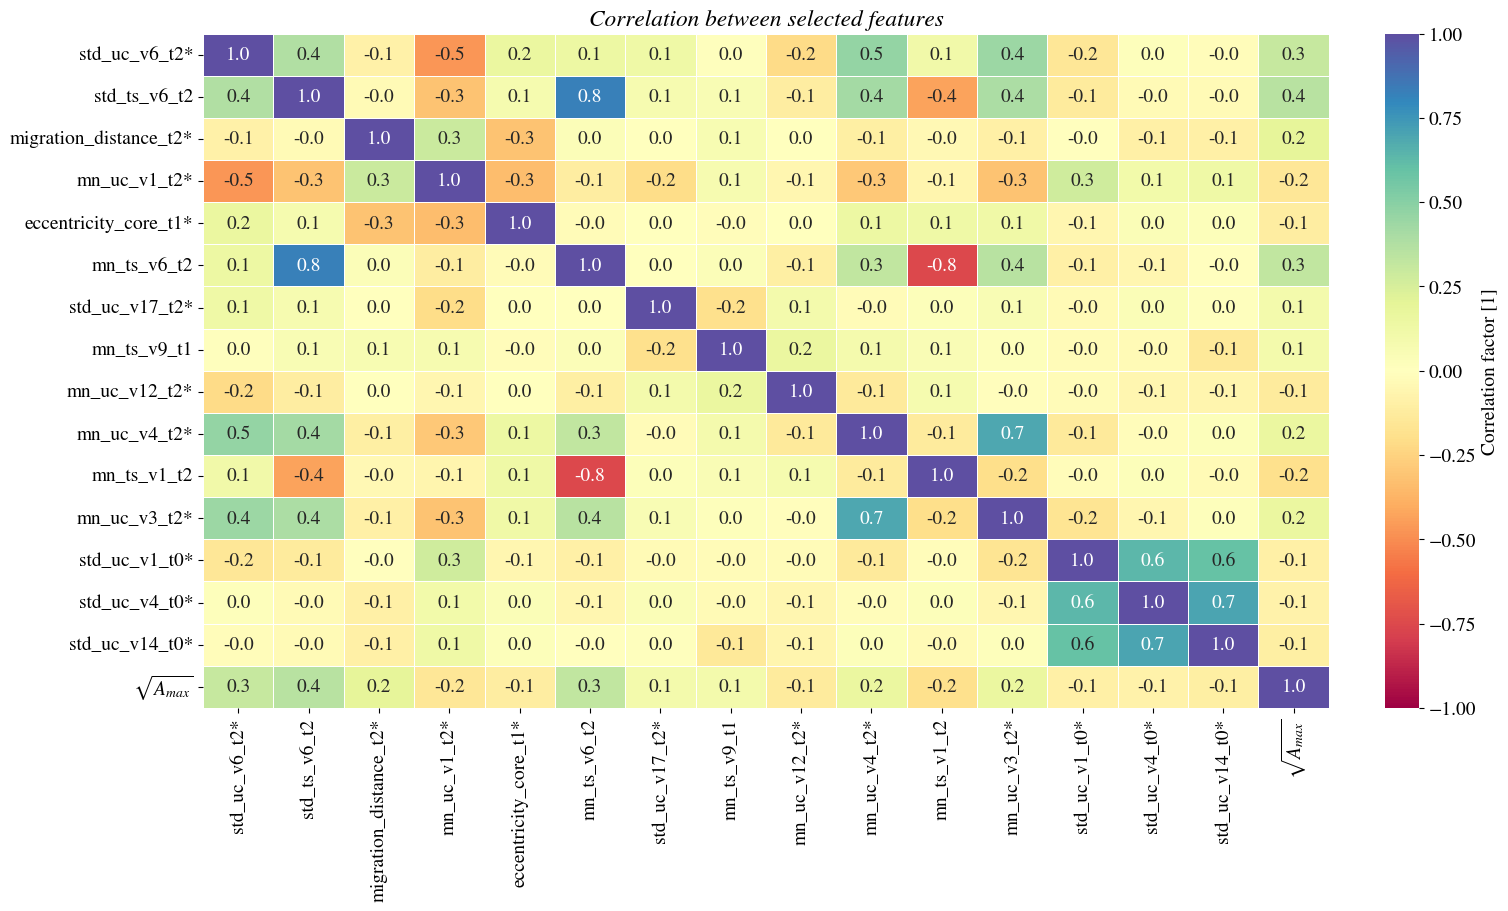

In [138]:
fig = plt.figure(figsize=(15,9), constrained_layout=True)


df = train_dataset_raw[features_selected_names[:15]]
df['Amax'] = y_train
import seaborn as sns

sns.heatmap(df.corr(),annot=True, cmap='Spectral', vmin=-1, vmax=1, fmt=".1f", linewidth=.5, cbar_kws={'label': 'Correlation factor [1]'})

list_corr_name =  new_features_selected_names_lasso[:15]
list_corr_name.append(r'$\sqrt{A_{max}}$')

plt.xticks(np.linspace(0.5,15.5, 16), list_corr_name, rotation=90)
plt.yticks(np.linspace(0.5,15.5, 16), list_corr_name, rotation=0)


plt.title('Correlation between selected features', fontstyle='italic')

#path_fig = os.path.join(path_figures, 'correl_features_matrx.pdf')

#plt.savefig(path_fig)

path_to_save = os.path.join(path_figures, 'figure_S8.pdf')
plt.savefig(path_to_save)

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
scaler = StandardScaler()
df_train = train_dataset_raw[features_selected_names[:15]]
scaler.fit(df_train)
df_pca = scaler.transform(df_train)
pca_fit = pca.fit_transform(df_pca)

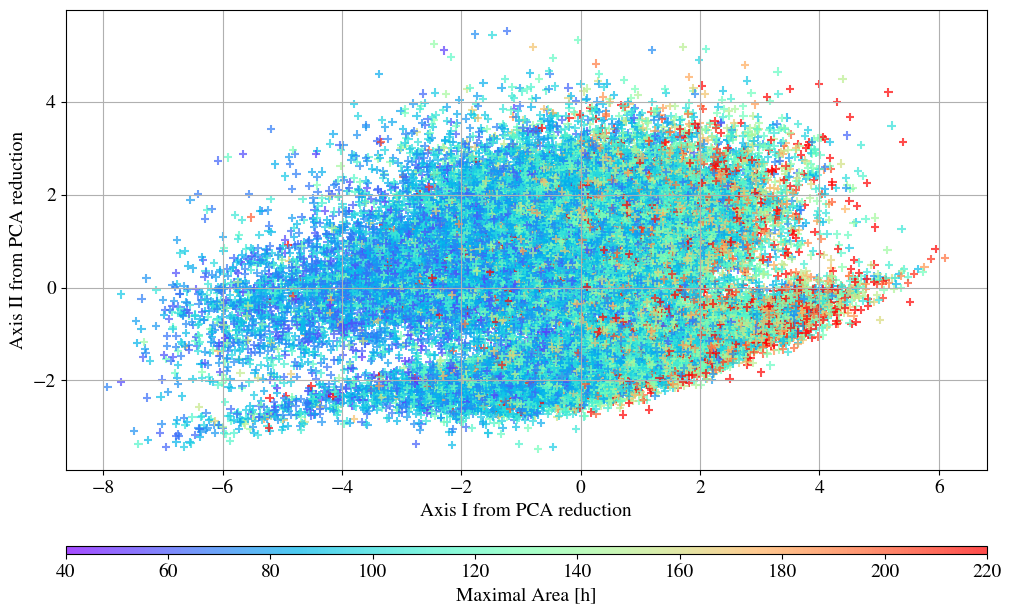

In [137]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)

im = plt.scatter(pca_fit[:,0], pca_fit[:,1], c = y_train, alpha=0.7, marker = '+', cmap='rainbow')
#im = plt.scatter(x_tsne[mistake_area_index,0], x_tsne[mistake_area_index,1], marker='+', color='k')

plt.colorbar(im, orientation='horizontal', label='Maximal Area [h]', aspect=110)
plt.clim(40,220)
plt.grid(True)
plt.xlabel(r'Axis I from PCA reduction')
plt.ylabel(r'Axis II from PCA reduction')
#plt.xlim(-5,10)
#plt.ylim(-5,10)

#plt.title(f'Cartography of MCS', fontstyle='italic')

path_to_save = os.path.join(path_figures, 'figure_S9.pdf')
plt.savefig(path_to_save)